In this code we are trying to predict the hospital readmission rate using different algorithms and then compare the results.

We use 3 algorithms to try and compare the results.

1. Logistic Regression
2. Random Forest
3. XGBoost


In logistic regression we plot the input X and our output y on the graph and we then we draw a line that best fits the data. Used for predicting numeric outcomes.
Y = W * X + b ; W= weights , b = bias

Random Forest: We have decision trees and the output of every decision tree is considered while predicting the output. Majority wins. Used for classification. It is called random because each tree gets a random slice of data.


XGBoost : This is an improvised version of Random Forest where every tree tries to work together and the output obtained by the previous decision tree is improvised at every step.


Confusion matrix
TN, FP,
FN, TP
Recall = no of  true positives caught,
precision = how many predicted positives are correct,
f1-score = Balance between Precision and Recall


In [ ]:
pip install ucimlrepo

In [25]:
###   Step 1: Load Dataset

from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset from uci repository
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes) features are X = input features and y = target is the output variable present in the dataset.
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets


print("X = ", X, "y = ",y)
# metadata
# print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

# Merge into one DataFrame. Merging features and targets in one dataframe.
df = pd.concat([X, y], axis=1)

# Show the shape and first few rows
print("Shape of full dataset:", df.shape)
df.head()

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


X =                     race  gender      age weight  admission_type_id  \
0             Caucasian  Female   [0-10)    NaN                  6   
1             Caucasian  Female  [10-20)    NaN                  1   
2       AfricanAmerican  Female  [20-30)    NaN                  1   
3             Caucasian    Male  [30-40)    NaN                  1   
4             Caucasian    Male  [40-50)    NaN                  1   
...                 ...     ...      ...    ...                ...   
101761  AfricanAmerican    Male  [70-80)    NaN                  1   
101762  AfricanAmerican  Female  [80-90)    NaN                  1   
101763        Caucasian    Male  [70-80)    NaN                  1   
101764        Caucasian  Female  [80-90)    NaN                  2   
101765        Caucasian    Male  [70-80)    NaN                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1   

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
print(X.columns)
print(y.columns)
print(df['readmitted'].value_counts())

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')
Index(['readmitted'], dtype='object')
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [ ]:
# Check the column names
print(df.columns)

# Look at unique values in the 'readmitted' column
print("Target column values:\n", df['readmitted'].value_counts())

##  Step 2: Convert readmitted to binary

# Create a new binary column: 1 = <30, 0 = otherwise
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Check distribution
print(df['readmitted_binary'].value_counts())

##   Drop columns we don’t need
df.drop(['readmitted'], axis=1, inplace=True)

# Check for missing values. This is to check which columns have missing data. We are using sum() to find the total missing values present in the dataset.
missing = df.isnull().sum()
missing[missing > 0]
# Drop rows where 'race' is missing (or impute later if you prefer)
df = df.dropna(subset=['race'])

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Target column values:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
r

In [ ]:
###     Step 3: Encoding Categorical Columns
# This will show which columns are of type 'object' (i.e., text)
cat_columns = df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_columns)

Categorical columns:
 Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape before encoding: (99493, 48)
Shape after encoding: (99493, 2416)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,False,True,True,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,False,True,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,True,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,False,False,False,False,False,True


In [23]:
from sklearn.model_selection import train_test_split

# Step 1: Separate X (inputs) and y (target)
X = df_encoded.drop('readmitted_binary', axis=1)
y = df_encoded['readmitted_binary']

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # your input and output
    test_size=0.2,       # 20% for testing, 80% for training
    random_state=42,     # for reproducibility
    stratify=y           # to keep class balance (important for imbalance)
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79594, 2415)
X_test shape: (19899, 2415)
y_train shape: (79594,)
y_test shape: (19899,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train logistic regression with class weights
lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_balanced.fit(X_train, y_train)

# Predict
y_pred_bal = lr_balanced.predict(X_test)
y_proba_bal = lr_balanced.predict_proba(X_test)[:, 1]

# Evaluate
print("🔄 Logistic Regression with class_weight='balanced':")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bal))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_bal))

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
# Create and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter helps it converge
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)  # Class predictions (0 or 1)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Classification report (includes Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8873310216593798

Confusion Matrix:
[[17615    50]
 [ 2192    42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17665
           1       0.46      0.02      0.04      2234

    accuracy                           0.89     19899
   macro avg       0.67      0.51      0.49     19899
weighted avg       0.84      0.89      0.84     19899

ROC-AUC Score: 0.6384732922304877


In [ ]:
############# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Create the Random Forest model with class weight handling
rf_model = RandomForestClassifier(
    n_estimators=100,          # number of trees
    random_state=42,           # ensures reproducibility
    class_weight='balanced'    # handles imbalanced classes
)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# 4. Evaluate the model
print("🌳 Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


🌳 Random Forest Classifier Results:
Accuracy: 0.8877833056937534

Confusion Matrix:
[[17658     7]
 [ 2226     8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17665
           1       0.53      0.00      0.01      2234

    accuracy                           0.89     19899
   macro avg       0.71      0.50      0.47     19899
weighted avg       0.85      0.89      0.84     19899

ROC-AUC Score: 0.6436834212582174


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Create the model
xgb = XGBClassifier(
    n_estimators=500,     # how many trees
    learning_rate=0.1,   # how fast the model learns
    max_depth=4,         # how deep each tree is
    scale_pos_weight=10,  # This helps with class imbalance
    random_state=42
)
# Clean column names to remove problematic characters
X_train.columns = [col.replace('[', '')
                       .replace(']', '')
                       .replace('<', '')
                       .replace('>', '')
                       .replace(' ', '_') for col in X_train.columns]

X_test.columns = [col.replace('[', '')
                       .replace(']', '')
                       .replace('<', '')
                       .replace('>', '')
                       .replace(' ', '_') for col in X_test.columns]


# Train
xgb.fit(X_train, y_train)

# Predict
# y_pred_xgb = xgb.predict(X_test
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.55).astype(int)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


Confusion Matrix:
 [[11651  6014]
 [  907  1327]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77     17665
           1       0.18      0.59      0.28      2234

    accuracy                           0.65     19899
   macro avg       0.55      0.63      0.52     19899
weighted avg       0.84      0.65      0.72     19899

ROC-AUC Score: 0.671067421353495


In [ ]:
# Recall = no of  true positives caught, precision = how many predicted positives are correct, f1-score = Balance between Precision and Recall

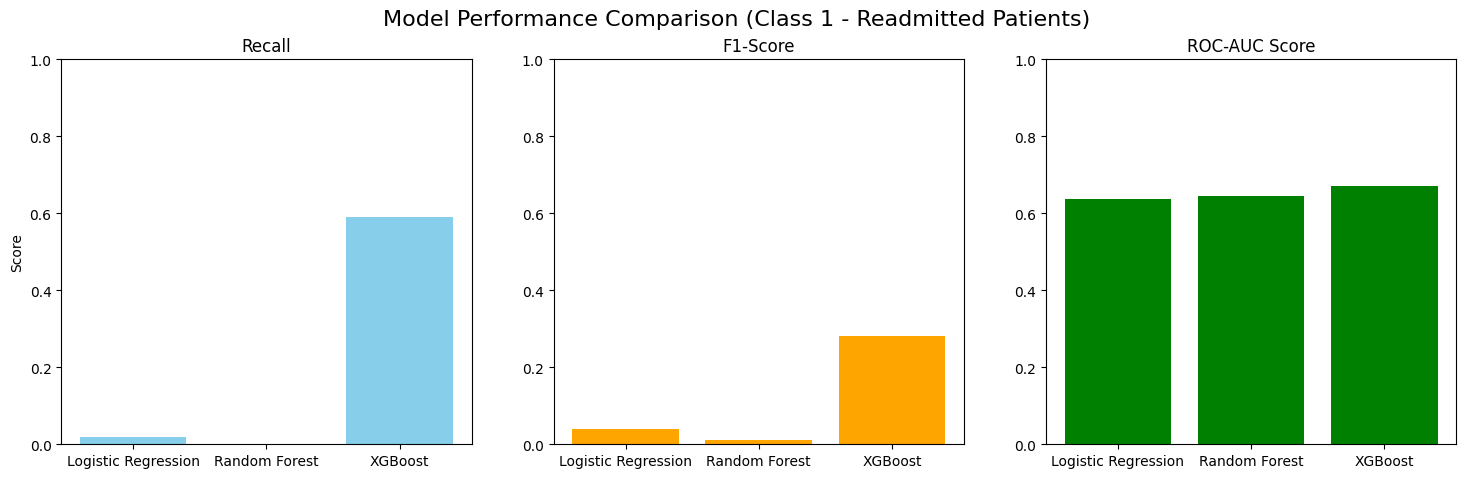

In [38]:
# Class 0 = not readmitted → majority of patients and Class 1 = readmitted within 30 days → rare, but critical! Hence we consider only Class 1.
import matplotlib.pyplot as plt

# Model Names
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Recall values for class 1 (Readmitted)
recalls = [0.02, 0.00, 0.59]

# F1-scores for class 1
f1_scores = [0.04, 0.01, 0.28]

# ROC-AUC Scores
roc_auc_scores = [0.638, 0.644, 0.6710]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Model Performance Comparison (Class 1 - Readmitted Patients)", fontsize=16)

# Recall Plot
axs[0].bar(models, recalls, color='skyblue')
axs[0].set_title('Recall')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Score')

# F1-Score Plot
axs[1].bar(models, f1_scores, color='orange')
axs[1].set_title('F1-Score')
axs[1].set_ylim(0, 1)

# ROC-AUC Plot
axs[2].bar(models, roc_auc_scores, color='green')
axs[2].set_title('ROC-AUC Score')
axs[2].set_ylim(0, 1)

plt.show()

